In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
data.shape

(126, 7)

In [5]:
data.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

In [6]:
data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [7]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Goal is to predict if a customer is happy or not based on the answers they give to questions asked

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [9]:
Y = data['Y']
X = data.drop('Y', axis = 1)

In [10]:
Y.shape, X.shape

((126,), (126, 6))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 15)

In [12]:
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (88, 6)
Test Data Dimensions :  (38, 6)


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [15]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='macro')

0.45192307692307687

In [16]:
import matplotlib.pyplot as plt

Feature: 0, Score: 0.44203
Feature: 1, Score: -0.05557
Feature: 2, Score: 0.07554
Feature: 3, Score: -0.14277
Feature: 4, Score: 0.18195
Feature: 5, Score: 0.16456


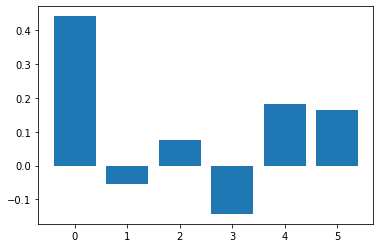

In [17]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Gradient boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train, Y_train)
Y_pred = gradient_boost.predict(X_test)
print('Accuracy of gradient boost classifier on test set: {:.2f}'.format(gradient_boost.score(X_test, Y_test)))

Accuracy of gradient boost classifier on test set: 0.63


##### Should the data be divided into 3 sets? training, test and validation set? but dividing into 3 would reduce the data avaliable for training, training set is already small.

In [29]:
scores = cross_val_score(gradient_boost, X, Y, cv=10)
scores

array([0.76923077, 0.53846154, 0.46153846, 0.53846154, 0.61538462,
       0.23076923, 0.83333333, 0.75      , 0.33333333, 0.5       ])

In [30]:
print("Accuracy of gradient boosting with 5-fold validation: %0.2f" % (scores.mean()))

Accuracy of gradient boosting with 5-fold validation: 0.56


##### cross fold validation is reducing the accuracy, why? 

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)
%time RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF.score(X_test, Y_test)))

CPU times: user 143 ms, sys: 2.73 ms, total: 146 ms
Wall time: 149 ms
Accuracy of Random Forest classifier on test set: 0.66


In [33]:
scores = cross_val_score(RF, X, Y, cv=10)
scores

array([0.69230769, 0.38461538, 0.46153846, 0.61538462, 0.61538462,
       0.38461538, 0.66666667, 0.75      , 0.33333333, 0.5       ])

In [43]:
print("Accuracy of Randon Forest with 10-fold validation: %0.2f" % (scores.mean()))

Accuracy of Randon Forest with 10-fold validation: 0.54


##### Again, accuracy reduced with cross validation

In [36]:
RF.feature_importances_

array([0.1511827 , 0.1772059 , 0.18402833, 0.16528549, 0.18015894,
       0.14213864])

In [42]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.184, 'X3'), (0.1802, 'X5'), (0.1772, 'X2'), (0.1653, 'X4'), (0.1512, 'X1'), (0.1421, 'X6')]
